# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (20)

**29/01/2024**

## Feature Engineering (Ingeniería de variables)

Un aumento en las **dimensiones** o el número de **variables explicativas** puede, en teoría, agregar más información a los datos  mejorando así la calidad de datos, pero está demostrado mediante el **efecto de _Hughes_** que prácticamente **a partir de un numero** óptimo de atributos, **se aumenta el ruido** y la redundancia presente en los datos.

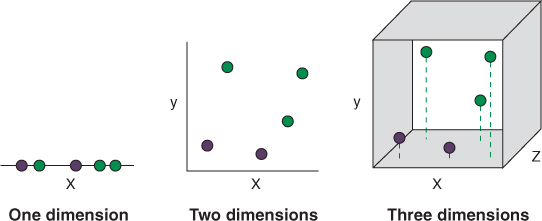


Este concepto que engloba varios problemas causados por la alta dimensionalidad de los datos en general, se conoce también como **[la maldición de la dimensión (_The curse of dimensionality_)](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)**   

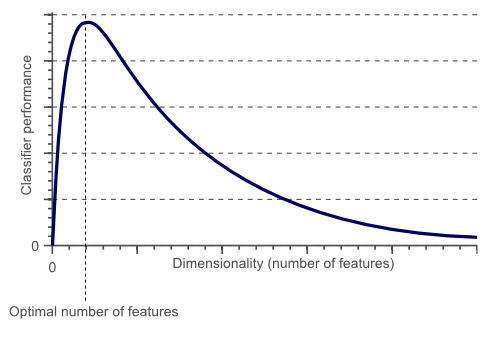

En _Machine Learning_, disponer de un conjunto de **datos de alta dimensión** es algo **muy común**. A medida que aumenta la dimensión de los datos, los **calculos** y el **coste computacional** de cualquier algoritmo de aprendizaje automático aumenta exponencialmente. La **visualización tampoco es posible** cuando el conjunto de datos está en un espacio de alta dimensión.

Por lo tanto, **reducir el espacio dimensional** se convierte en una parte importante del aprendizaje automático. Podemos reducir la dimensión en términos generales siguiendo dos formas:

- **Selección de características (_Feature Selection_)**: selección de variables más importantes que son relevantes para el modelo.

- **Extracción de características (_Feature Extraction_)**: transformación de un espacio de alta dimensión en un espacio de menor dimensión mediante el uso de varios métodos de **reducción de dimensionalidad**  como PCA (_Principal Component Analysis_).

### Análisis de Componentes Principales (PCA)

El análisis de componentes principales o **[PCA (_Principle Component Analysis_)](https://en.wikipedia.org/wiki/Principal_component_analysis)** es uno de los métodos de análisis y reducción de dimensionalidad de datos multivariantes. _PCA_ puede transformar el conjunto original de variables en otro conjunto de **nuevas
variables incorreladas entre sí** (que no tenga repetición o redundancia en la información) llamado **conjunto de componentes principales**.

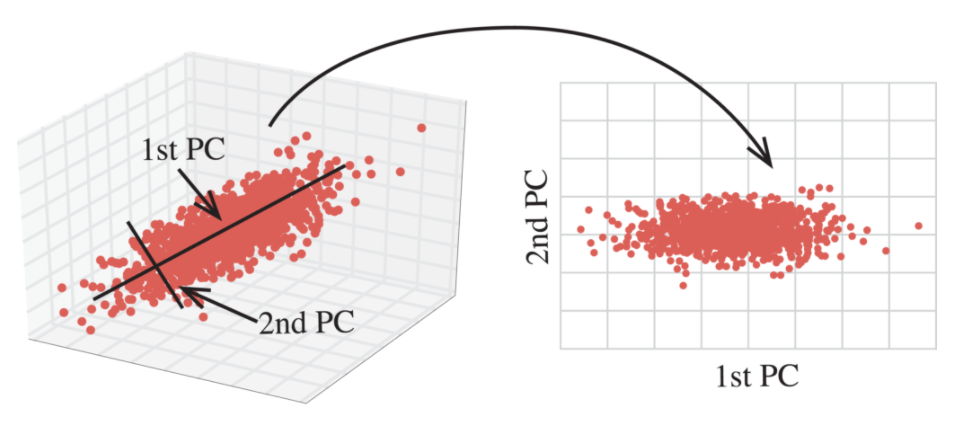

Las nuevas variables son **combinaciones lineales** de las anteriores y se van construyendo según **el orden de importancia en cuanto a la variabilidad** total que recogen de la muestra.

El cálculo matemático para extraer los componentes principales de una matriz o el tablón de un conjunyo de datos, se basa en los vectores propios o **autovectores (_eigenvectors_)** y en los valores propios o **autovalores (_eigenvalues_)** de **la matriz de correlaciones** de las variables.

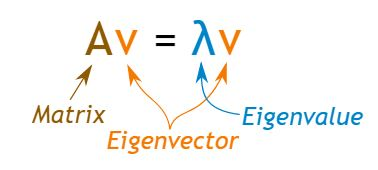


- Los autovectores (___eigenvectors___) de una matriz son **todos aquellos vectores que, al multiplicarlos por dicha matriz, resulten en el mismo vector o en un múltiplo del mismo**.  
- Los autovalores (___eigenvalues___) son **aquellos escalares que se multiplican por cada eigenvector**.

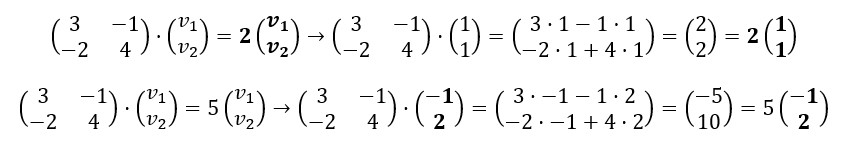

Podemos decir que los ___eigenvalues___ representan **la proporción de varianza explicada por cada componente**, cuando cada componente está en la dirección que marca un ___eigenvector___. El vector que define el primer componente principal (_PC1_) **sigue la dirección en la que las observaciones varían más**. La proyección de cada observación sobre esa dirección equivale al valor del primer componente para dicha observación.

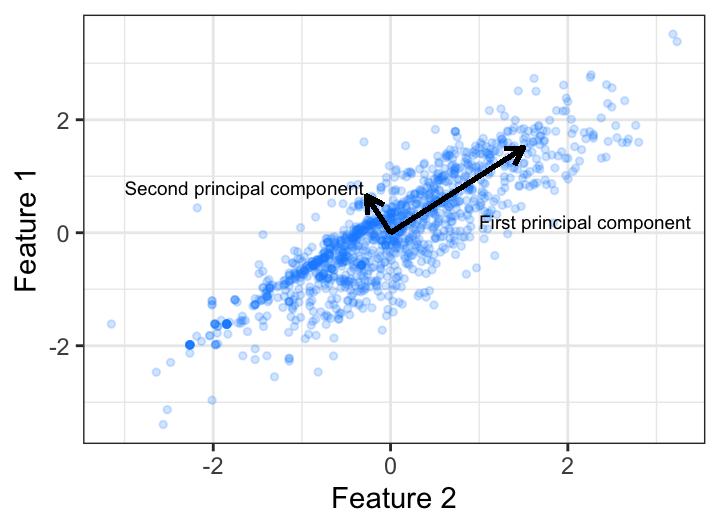

El segundo componente principal (_PC2_) sigue **la segunda dirección en la que los datos muestran mayor varianza** y que no está correlacionado con el primer componente. Cuando decimos que **no hay una correlación entre componentes principales**, quiere decir que **sus direcciones son perpendiculares** u ortogonales.

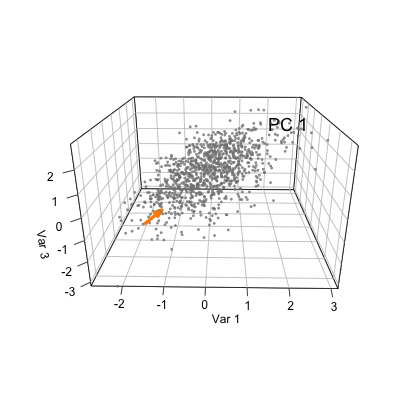

Considerando que **la suma de los _eigenvalues_ es el total de varianza explicada**, se pueden **seleccionar solo aquellos componentes qué más aporten al total de varianza explicada**. De este modo se consigue hacer una reducción de dimensionalidad, **mantenidendo la información y la mayor varianza presente** en el conjunto de **datos original**.

---

## [Wine recognition dataset](https://archive.ics.uci.edu/ml/datasets/Wine)

Estos datos son el resultado de un **análisis químico de vinos** cultivados en una región de *Italia* pero derivados de tres variedades diferentes. El análisis determinó las cantidades de 13 ingredientes que se encuentran en cada uno de los tres tipos de vinos.

Los atributos que se han podido medir en el laboratorio son: 
1) alcohol
2) ácido málico
3) Ceniza
4) Alcalinidad de la ceniza
5) magnesio
6) fenoles totales
7) Flavonoides
8) Fenoles no flavonoides
9) proantocianinas
10) Intensidad de color
11) tonalidad
12) OD280/OD315 de vinos diluidos
13) prolina

Vamos a descargar este conjunto de datos con el objetivo de poder clasificar un vino en base a sus características: 

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [3]:
from sklearn.datasets import load_wine

# Construimos un dataframe con los datos medidos
dataset_vino = pd.DataFrame(load_wine()["data"], columns=load_wine()["feature_names"])

# Añadimos la etiqueta
dataset_vino["label"] = load_wine()["target_names"][load_wine()["target"]]

dataset_vino

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline    label  
0                            3.92   1065.0  class_0  
1                            3.40   1050.0  class_0  
2                            3.17   1185.0  class_0  
3                            3.45   1480.0  class_0  
4                            2.93    735.0  class_0  
..                            ...      ...      ...  
173                          1.74    740.0  class_2  
174                          1.56    750.0  class_2  
175                          1.56    835.0  class_2  
176                          1.62    840.0  class_2  
177                          1.60    560.0  class_2  

[178 rows x 14 columns]

In [4]:
# información del DataFrame resultante
dataset_vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [5]:
# Comprobar la existencia de valores nulos/perdidos
dataset_vino.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [6]:
# Las principales características del conjunto de datos
dataset_vino.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

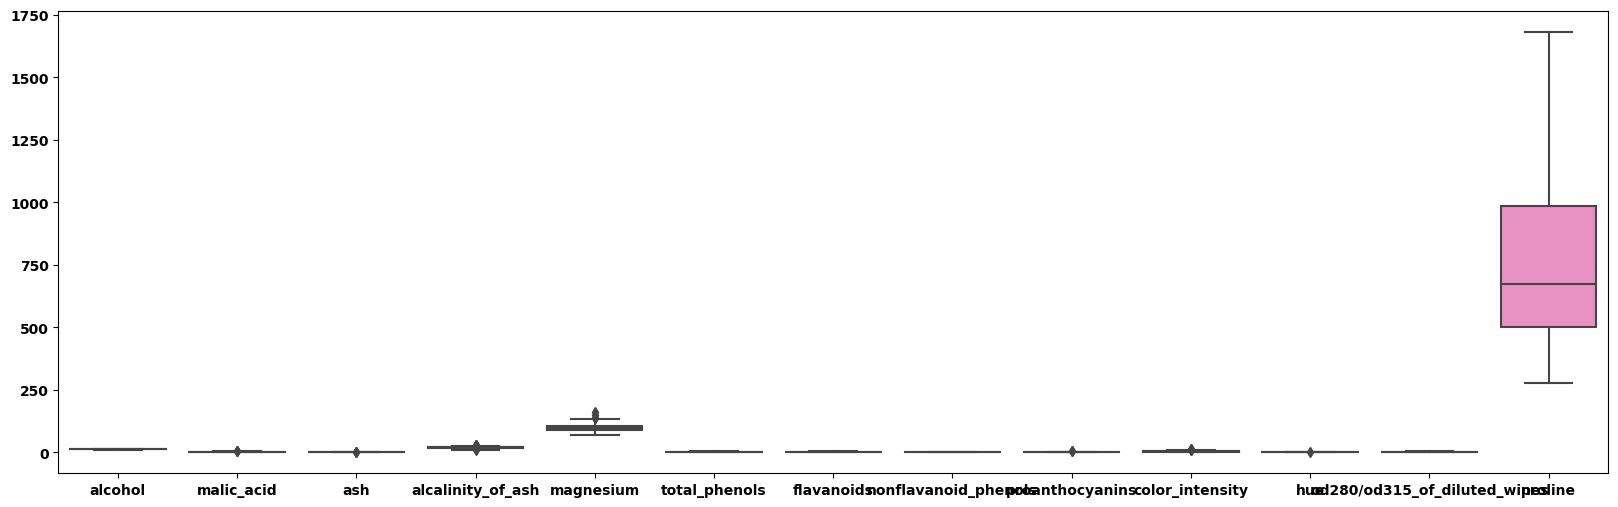

In [7]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.boxplot(data=dataset_vino,  orient='v')
plt.show()

In [8]:
# Filtrar los datos numéricos
df_vino_num = dataset_vino.drop("label", axis='columns')
df_vino_num

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

Procedemos a estandarizar el contenido de las variables del dataset:

In [9]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado_v = StandardScaler().fit(df_vino_num)
dataset_vino_normal = escalado_v.transform(df_vino_num)
dataset_vino_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
df_vino_normal = pd.DataFrame(dataset_vino_normal, columns=df_vino_num.columns)
print(type(df_vino_normal))
df_vino_normal

<class 'pandas.core.frame.DataFrame'>


alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.251717  0.362177                      1.847920  1.013009  
1          -0.293321  0.406051                      1.113449  0.965242  
2           0.269020  0.318304                      0.788587  1.395148  
3           1.186068 -0.427544                      1.184071  2.334574  
4          -0.319276  0.362177                      0.449601 -0.037874  
..               ...       ...                           ...       ...  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160  

[178 rows x 13 columns]

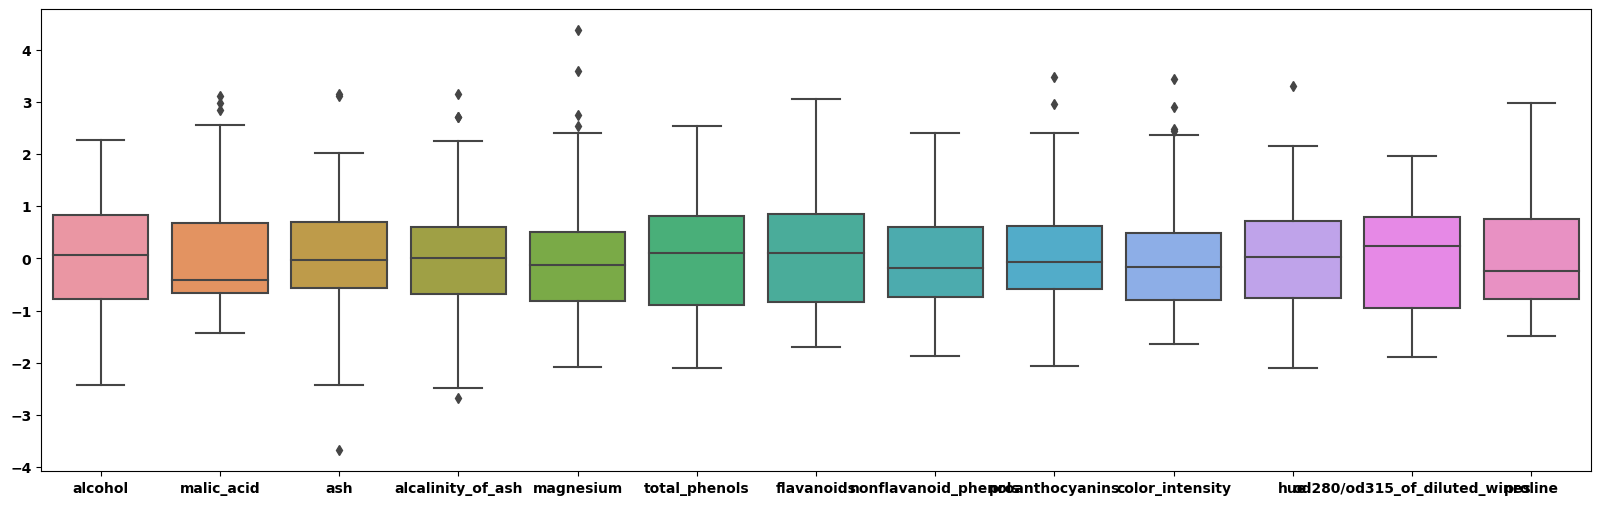

In [11]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=df_vino_normal,  orient='v')
plt.show()

In [12]:
# Añadimos el label a la tabla con datos númericos normalizados de cara a la visualización de los puntos de datos por clase de vino
df_vino_labels = df_vino_normal.copy()
df_vino_labels['clase'] = dataset_vino['label']
df_vino_labels

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  \
0           0.251717  0.362177                      1.847920  1.013009   
1          -0.293321  0.406051                      1.113449  0.965242   
2           0.269020  0.318304                      0.788587  1.395148   
3           1.186068 -0.427544                      1.184071  2.334574   
4          -0.319276  0.362177                      0.449601 -0.037874   
..               ...       ...                           ...       ...   
173         1.142811 -1.392758                     -1.231206 -0.021952   
174         0.969783 -1.129518                     -1.485445  0.009893   
175         2.224236 -1.612125                     -1.485445  0.280575   
176         1.834923 -1.568252                     -1.400699  0.296498   
177         1.791666 -1.524378                     -1.428948 -0.595160   

       clase  
0    class_0  
1    class_0  
2    class_0  
3    class_0  
4    class_0  
..       ...  
173  class_2  
174  class_2  
175  class_2  
176  class_2  
177  class_2  

[178 rows x 14 columns]

Echamos un vistazo a las correlaciones entre las variables

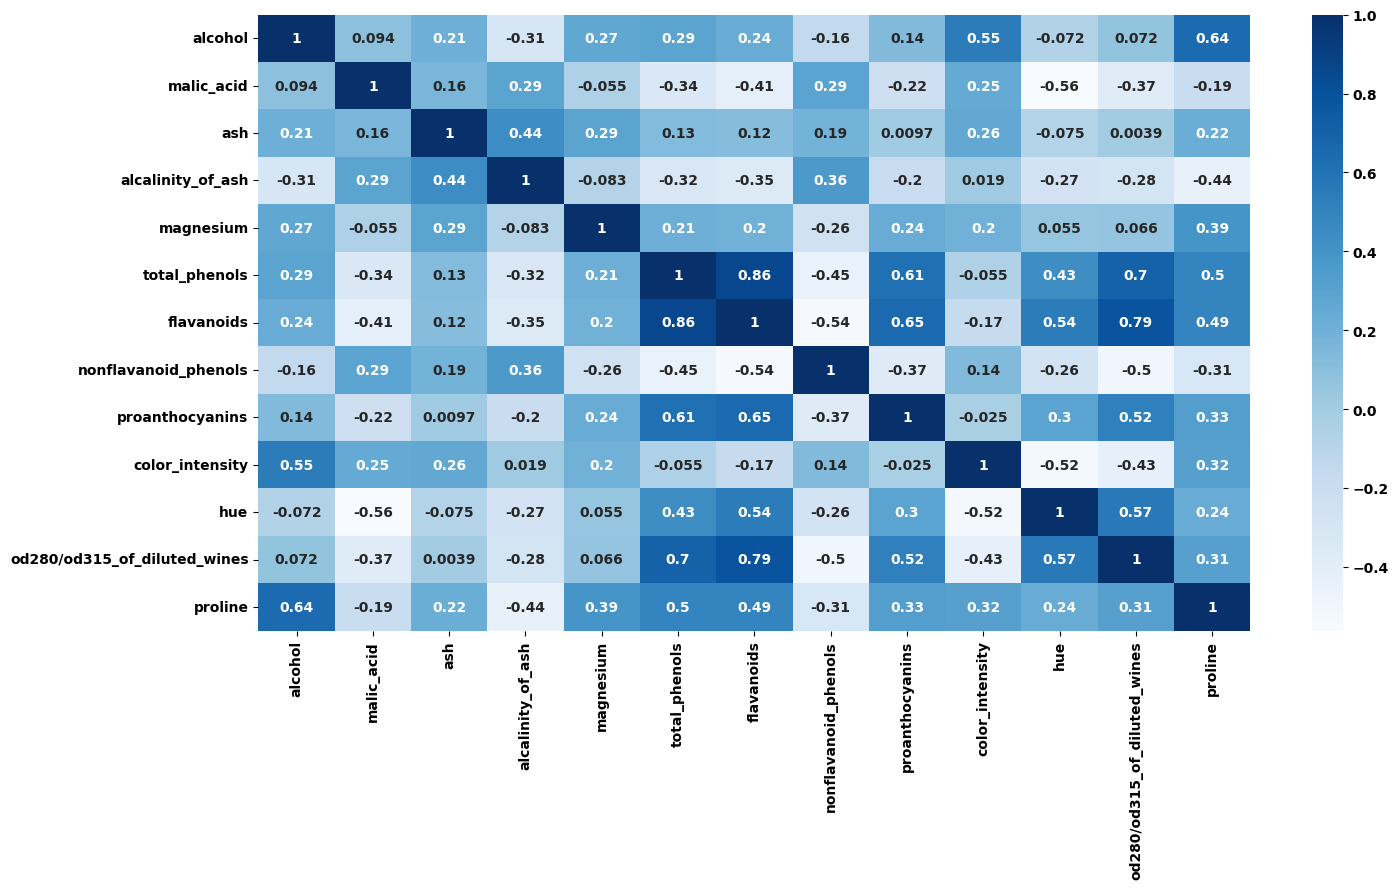

In [13]:
plt.figure(figsize = (16,8))
sns.heatmap(df_vino_normal.corr(), cmap='Blues', annot = True)
plt.show()

Aquí además vamos a ver los datos pintados por su categoría de cada vino, previamente clasificado

In [14]:
sns.pairplot(data=df_vino_labels, hue='clase', height=3)
plt.show()

Elegimos una de las gráficas que nos permite tener una visualización bidimensional de los puntos de datos

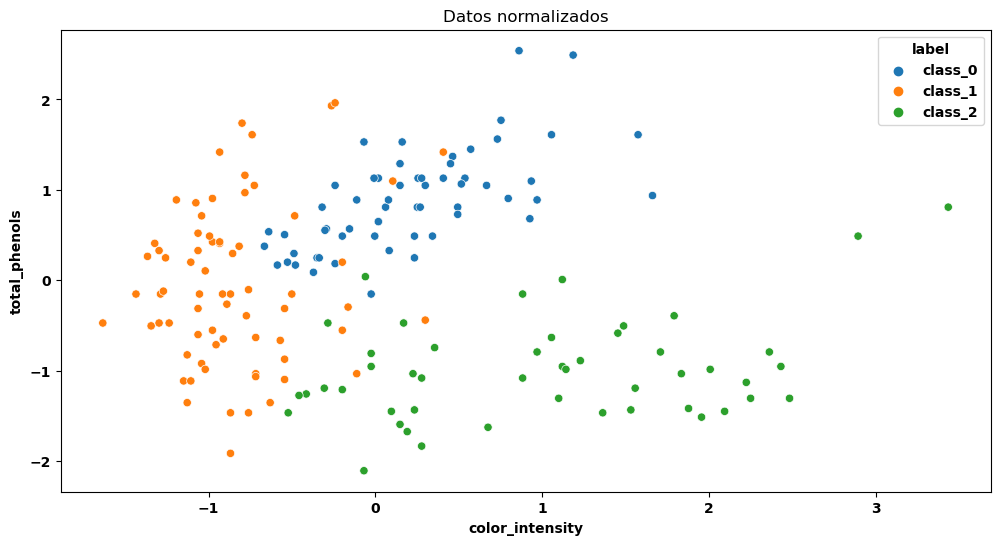

In [ ]:
sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=dataset_vino['label'])
plt.title("Datos normalizados")
plt.show()

Realizamos un clustering mediante el método de _K-means_ considerando que hay tres tipos de vinos (_k=3_)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

modelo_kmeans = KMeans(n_clusters=3, random_state=100)

modelo_kmeans.fit(df_vino_normal)

y_etiquetas = modelo_kmeans.labels_

centros_clust = modelo_kmeans.cluster_centers_

print("SSE = ", modelo_kmeans.inertia_)
print("Silhouette score = ", silhouette_score(df_vino_normal, y_etiquetas))


d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SSE =  1277.928488844642
Silhouette score =  0.2848589191898987


In [ ]:
df_vino_normal.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
# Para poder sacar el índice de cada columna por su nombre, podemos usar el siguienete método:
df_vino_normal.columns.get_loc('magnesium')

4

Graficamos los resultados para visualizar los clusters con el mismo par de variables:

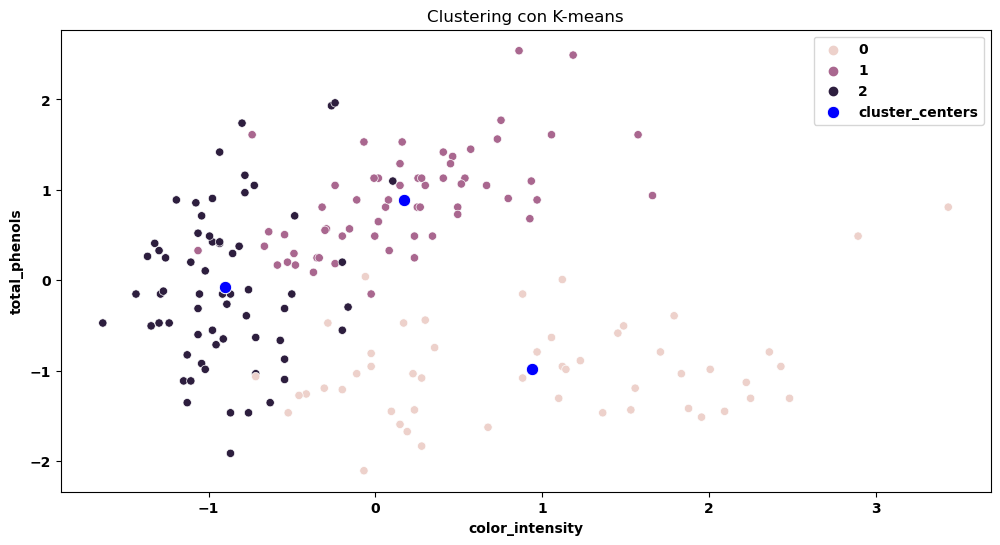

In [ ]:
# Graficar los resultados
sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=y_etiquetas)
sns.scatterplot(x=centros_clust[:,df_vino_normal.columns.get_loc('color_intensity')],
                y=centros_clust[:,df_vino_normal.columns.get_loc('total_phenols')], color='blue', s=80, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

In [ ]:
y_etiquetas

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
y_km_label = np.where(y_etiquetas==0, 'class_1', np.where(y_etiquetas==1, 'class_0', 'class_2'))
y_km_label = pd.Series(y_km_label, name='label')
y_km_label

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_1
174    class_1
175    class_1
176    class_1
177    class_1
Name: label, Length: 178, dtype: object

Comparamos los resultados del _K-Means Clustering_ con las etiquetas reales de vinos clasificados en el laboratorio. 

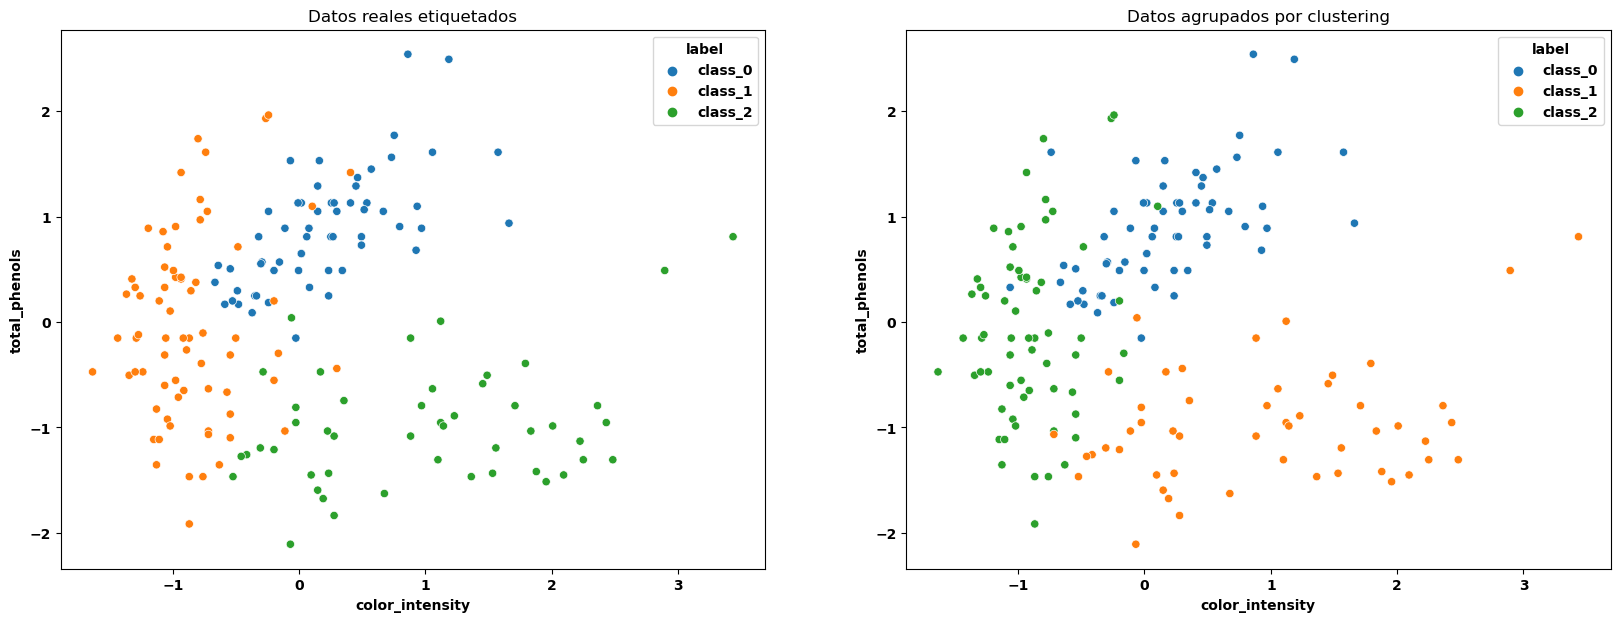

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=dataset_vino['label'], ax=axes[0])
axes[0].set_title("Datos reales etiquetados")

sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=y_km_label, hue_order=['class_0', 'class_1', 'class_2'], ax=axes[1])
axes[1].set_title("Datos agrupados por clustering")

plt.show()

In [ ]:
diff_pos = [i for i in range(len(y_km_label)) if y_km_label[i]!=dataset_vino['label'][i]]
print("El modelo de clustering se ha euivocado en clasificar %s vinos" % len(diff_pos))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos)/len(y_km_label))*100))
y_km_label[diff_pos]

El modelo de clustering se ha euivocado en clasificar 116 vinos
El porcentage de acierto es 34.8314606741573%


59     class_2
60     class_2
62     class_2
63     class_2
64     class_2
        ...   
173    class_1
174    class_1
175    class_1
176    class_1
177    class_1
Name: label, Length: 116, dtype: object

Se puede ver que hay un porcentaje muy alto de acierto. La siguiente gráfica visualiza los vinos clasificados de forma equivocada.

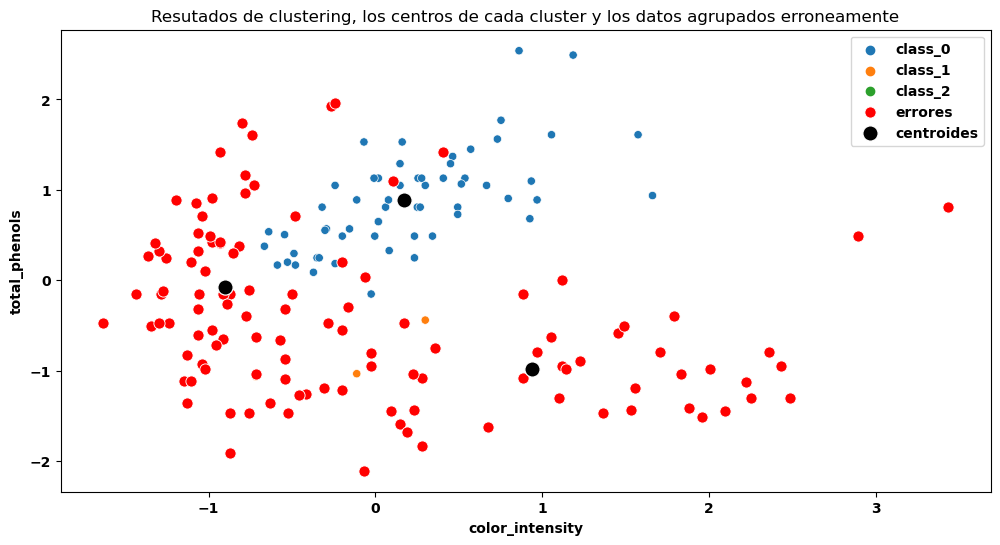

In [ ]:
sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=y_km_label, hue_order=['class_0', 'class_1', 'class_2'])
sns.scatterplot(x=df_vino_normal['color_intensity'][diff_pos], y=df_vino_normal['total_phenols'][diff_pos], marker='o', color = 'red', s=65, label='errores')
sns.scatterplot(x=centros_clust[:, df_vino_normal.columns.get_loc('color_intensity')],
                y=centros_clust[:, df_vino_normal.columns.get_loc('total_phenols')], color='black', s=120, label='centroides')
plt.title("Resutados de clustering, los centros de cada cluster y los datos agrupados erroneamente")
plt.show()


En este agrupamiento hemos considerado las 13 dimensiones presentes en el dataset. Ahora, vamos a realizar el clustering con **un tablón que contiene solamente 2 variables**. Nos quedamos por ejemplo con las dos variable de `color_intensity` y `total_phenols` que se han graficado en el modelo anterior.  

In [ ]:
# Creamos un subconjunto de datos con solamente 2 dimensiones
df_vino_2d = df_vino_normal[['color_intensity', 'total_phenols']]
df_vino_2d

color_intensity  total_phenols
0           0.251717       0.808997
1          -0.293321       0.568648
2           0.269020       0.808997
3           1.186068       2.491446
4          -0.319276       0.808997
..               ...            ...
173         1.142811      -0.985614
174         0.969783      -0.793334
175         2.224236      -1.129824
176         1.834923      -1.033684
177         1.791666      -0.392751

[178 rows x 2 columns]

Ahora hacemos el mismo _clustering_ pero ésta vez con un conjunto de datos que solamente contiene dos variables para representar a cada observación.

d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SSE =  120.29003734991373
Silhouette score =  0.43694693910332383


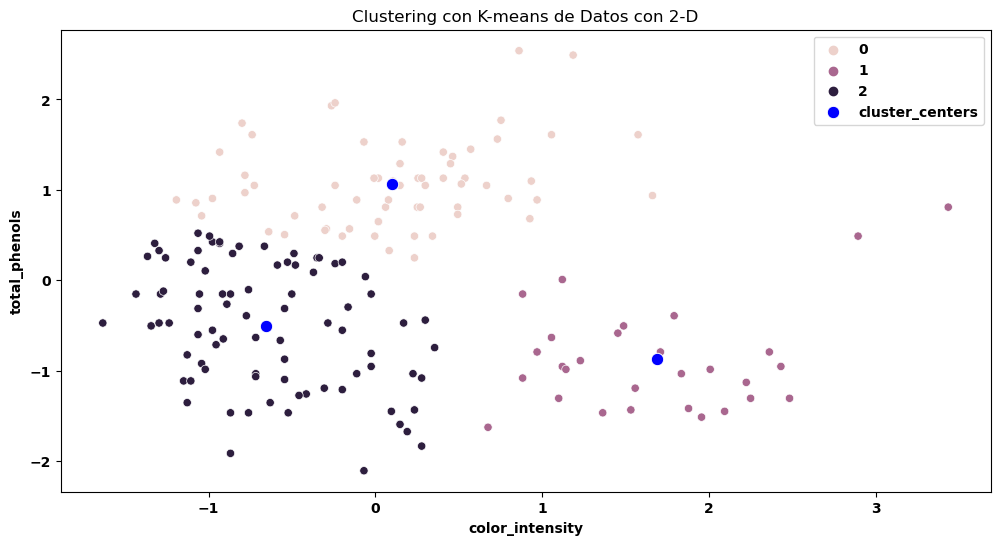

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

modelo_kmeans_2d = KMeans(n_clusters=3, random_state=100)

modelo_kmeans_2d.fit(df_vino_2d)

y_etiquetas_2d = modelo_kmeans_2d.labels_

centros_clust_2d = modelo_kmeans_2d.cluster_centers_

print("SSE = ", modelo_kmeans_2d.inertia_)
print("Silhouette score = ", silhouette_score(df_vino_2d, y_etiquetas_2d))

# Graficar los resultados
sns.scatterplot(x=df_vino_2d['color_intensity'], y=df_vino_2d['total_phenols'], hue=y_etiquetas_2d)
sns.scatterplot(x=centros_clust_2d[:,0], y=centros_clust_2d[:,1], color='blue', s=80, label='cluster_centers')
plt.title("Clustering con K-means de Datos con 2-D")
plt.show()

In [ ]:
y_etiquetas_2d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
y_km_2d = np.where(y_etiquetas_2d==0, 'class_1', np.where(y_etiquetas_2d==1, 'class_0', 'class_2'))
y_km_2d = pd.Series(y_km_2d, name='label')
y_km_2d

0      class_1
1      class_1
2      class_1
3      class_1
4      class_1
        ...   
173    class_0
174    class_0
175    class_0
176    class_0
177    class_0
Name: label, Length: 178, dtype: object

Comparamos la agrupación de vinos conseguido por el modelo de _K-means clustering_ con la clasificación verdadera de los vinos analizados en el laboratorio. 

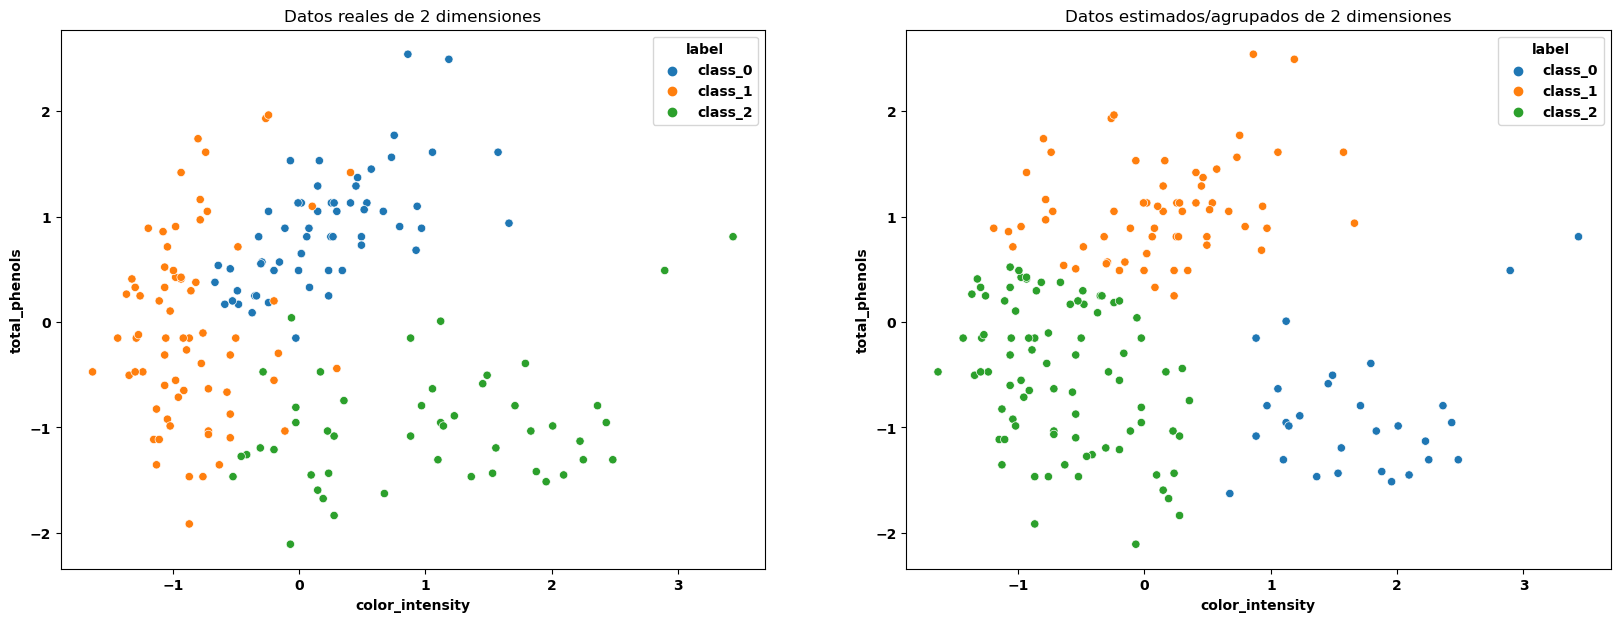

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=dataset_vino['label'], ax=axes[0])
axes[0].set_title("Datos reales de 2 dimensiones")

sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=y_km_2d, hue_order=['class_0', 'class_1', 'class_2'], ax=axes[1])
axes[1].set_title("Datos estimados/agrupados de 2 dimensiones")

plt.show()

In [ ]:
diff_pos_2d = [i for i in range(len(y_km_2d)) if y_km_2d[i]!=dataset_vino['label'][i]]
print("El modelo de clustering se ha equivocado en clasificar %s vinos" % len(diff_pos_2d))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_2d)/len(y_km_2d))*100))
y_km_2d[diff_pos_2d]

El modelo de clustering se ha equivocado en clasificar 144 vinos
El porcentage de acierto es 19.10112359550562%


0      class_1
1      class_1
2      class_1
3      class_1
4      class_1
        ...   
173    class_0
174    class_0
175    class_0
176    class_0
177    class_0
Name: label, Length: 144, dtype: object

Se puede observar que esta vez **se consigue un rendimiento bastante inferior** que el _clustering_ realizado con los datos de 13 dimensiones. El porcentaje de acierto es menor **por descartar las otras 11 características** que representan cada clase de vino.

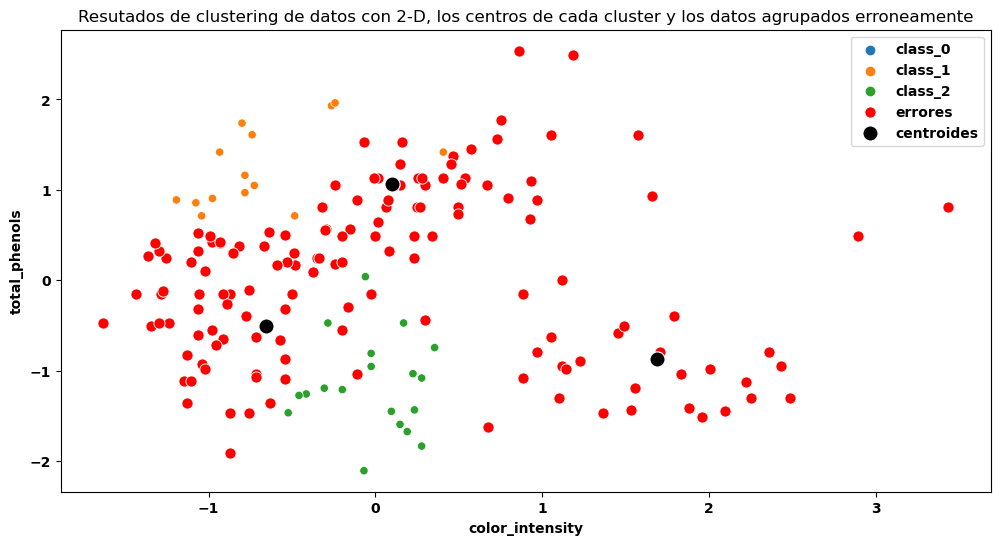

In [ ]:
sns.scatterplot(x=df_vino_normal['color_intensity'], y=df_vino_normal['total_phenols'], hue=y_km_2d, hue_order=['class_0', 'class_1', 'class_2'])
sns.scatterplot(x=df_vino_normal['color_intensity'][diff_pos_2d], y=df_vino_normal['total_phenols'][diff_pos_2d], marker='o', color = 'red', s=65, label='errores')
sns.scatterplot(x=centros_clust_2d[:, 0], y=centros_clust_2d[:, 1], color='black', s=120, label='centroides')
plt.title("Resutados de clustering de datos con 2-D, los centros de cada cluster y los datos agrupados erroneamente")
plt.show()

#### Reducción de dimensionalidad mediante la aplicación de PCA

Ahora vamos a reducir las dimensiones del dataset original a un espacio bidimensional, pero en vez de cargarnos el resto de las variables sin más, procedemos a **realizar un análisis de componentes principales (PCA)** para poder proyeccionar los datos de manera que **dispongan solamente de 2 dimensiones**.

In [ ]:
# calculamos la matriz de correlación entre las variables (correlation matrix)
df_corr = df_vino_normal.corr()
df_corr

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              od280/od315_of_diluted_wines   prol

In [ ]:
# Extraemos los autovalores (eigenvalues) y los autovectores (eigenvectors) de la matriz de correlación
eigenvalues, eigenvectors = np.linalg.eig(df_corr)


In [ ]:
eigenvectors.shape

(13, 13)

In [ ]:
eigenvalues

array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
       0.64165703, 0.55102831, 0.10337794, 0.34849736, 0.16877023,
       0.28887994, 0.22578864, 0.25090248])

In [ ]:
# Ordenamos los autovalores para llegar a tener las posiciones en un order descendiente
eigenvalues_ordenados = np.argsort(eigenvalues)[::-1]
eigenvalues_ordenados

array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 12, 11,  9,  7], dtype=int64)

In [ ]:
# Extraemos las posiciones de los top k autovalores
k=2
eigenvalues_ordenados[:k]

array([0, 1], dtype=int64)

In [ ]:
# Extraemos los top k autovectores correspondientes a los top k autovalores
top_k_eigenvectors = eigenvectors[:, eigenvalues_ordenados[:k]]
top_k_eigenvectors

array([[-0.1443294 ,  0.48365155],
       [ 0.24518758,  0.22493093],
       [ 0.00205106,  0.31606881],
       [ 0.23932041, -0.0105905 ],
       [-0.14199204,  0.299634  ],
       [-0.39466085,  0.06503951],
       [-0.4229343 , -0.00335981],
       [ 0.2985331 ,  0.02877949],
       [-0.31342949,  0.03930172],
       [ 0.0886167 ,  0.52999567],
       [-0.29671456, -0.27923515],
       [-0.37616741, -0.16449619],
       [-0.28675223,  0.36490283]])

Una vez que tengamos calculados los _eigenvectores_ más importantes, podemos proyeccionar los datos al nuevo espacio de variables, definido por los _top k genvectores_.

In [ ]:
size_1 = df_vino_normal.shape
size_2 = top_k_eigenvectors.shape
print("Multplicación matricial de tamaño {s1} . {s2}".format(s1=size_1, s2=size_2))

Multplicación matricial de tamaño (178, 13) . (13, 2)


In [ ]:
# Calculamos la multiplicación matricial entre los datos y los top k autovectores, y así obtenemos los componentes principales.
df_proj = df_vino_normal.dot(top_k_eigenvectors)
df_proj.columns = ['pc1', 'pc2']
df_proj

pc1       pc2
0   -3.316751  1.443463
1   -2.209465 -0.333393
2   -2.516740  1.031151
3   -3.757066  2.756372
4   -1.008908  0.869831
..        ...       ...
173  3.370524  2.216289
174  2.601956  1.757229
175  2.677839  2.760899
176  2.387017  2.297347
177  3.208758  2.768920

[178 rows x 2 columns]

La idea de _PCA_ es extraer los **componentes principales** que no tengan **ninguna correlación entre ellos**. Esto nos lo puede confirmar los datos proyectados al espacio bidimensional en este caso. 

In [ ]:
df_proj.corr().round(10)

pc1  pc2
pc1  1.0 -0.0
pc2 -0.0  1.0

Aprovechamos el espacio bidimensional de características para **visualizar las observaciones** en las nuevas coordenadas.

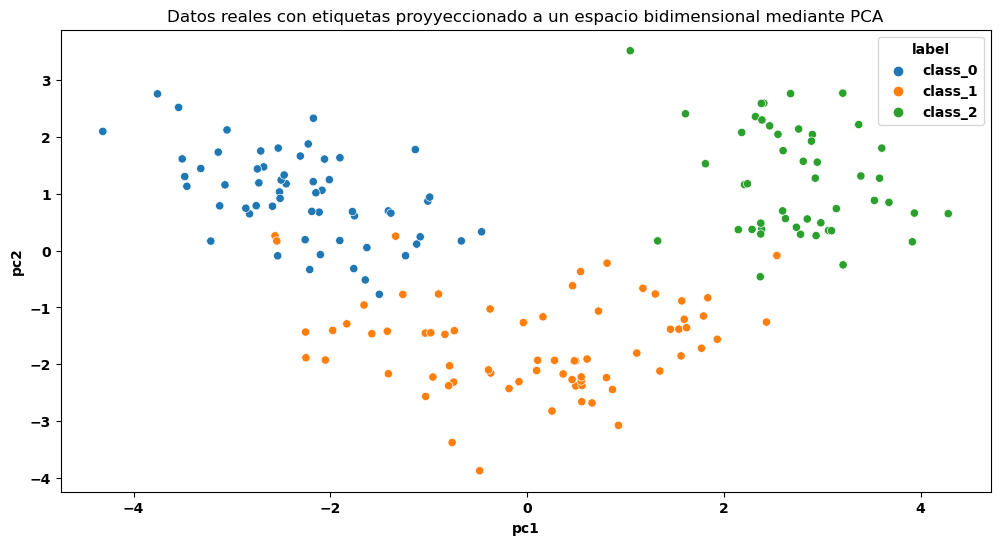

In [ ]:
sns.scatterplot(x=df_proj['pc1'], y=df_proj['pc2'], hue=dataset_vino['label'])
plt.title("Datos reales con etiquetas proyyeccionado a un espacio bidimensional mediante PCA")
plt.show()

Realizamos el **mismo ejercico** pero contra los **datos proyeccionados** a un espacio con 2 dimensiones representadas con los dos primeros componentes principales.

d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SSE =  259.5093807511932
Silhouette score =  0.5610505693103246


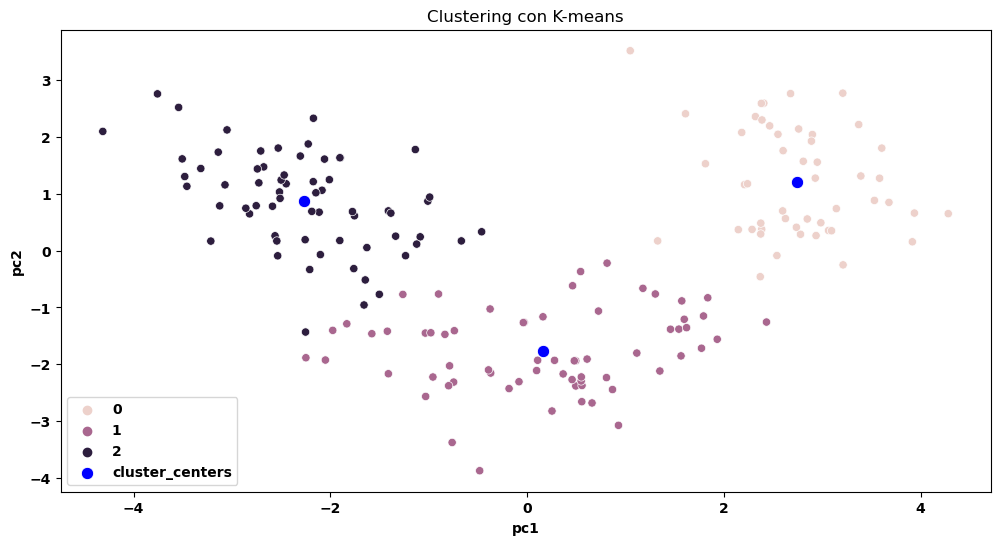

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

modelo_kmeans_pca = KMeans(n_clusters=3, random_state=100)

modelo_kmeans_pca.fit(df_proj)

y_etiquetas_pca = modelo_kmeans_pca.labels_

centros_clust_pca = modelo_kmeans_pca.cluster_centers_

print("SSE = ", modelo_kmeans_pca.inertia_)
print("Silhouette score = ", silhouette_score(df_proj, y_etiquetas_pca))

# Graficar los resultados
sns.scatterplot(x=df_proj['pc1'], y=df_proj['pc2'], hue=y_etiquetas_pca)
sns.scatterplot(x=centros_clust_pca[:,0], y=centros_clust_pca[:,1], color='blue', s=80, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

In [ ]:
y_etiquetas_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
y_km_pca = np.where(y_etiquetas_pca==0, 'class_1', np.where(y_etiquetas_pca==1, 'class_0', 'class_2'))
y_km_pca = pd.Series(y_km_pca, name='label')
y_km_pca

0      class_2
1      class_2
2      class_2
3      class_2
4      class_2
        ...   
173    class_1
174    class_1
175    class_1
176    class_1
177    class_1
Name: label, Length: 178, dtype: object

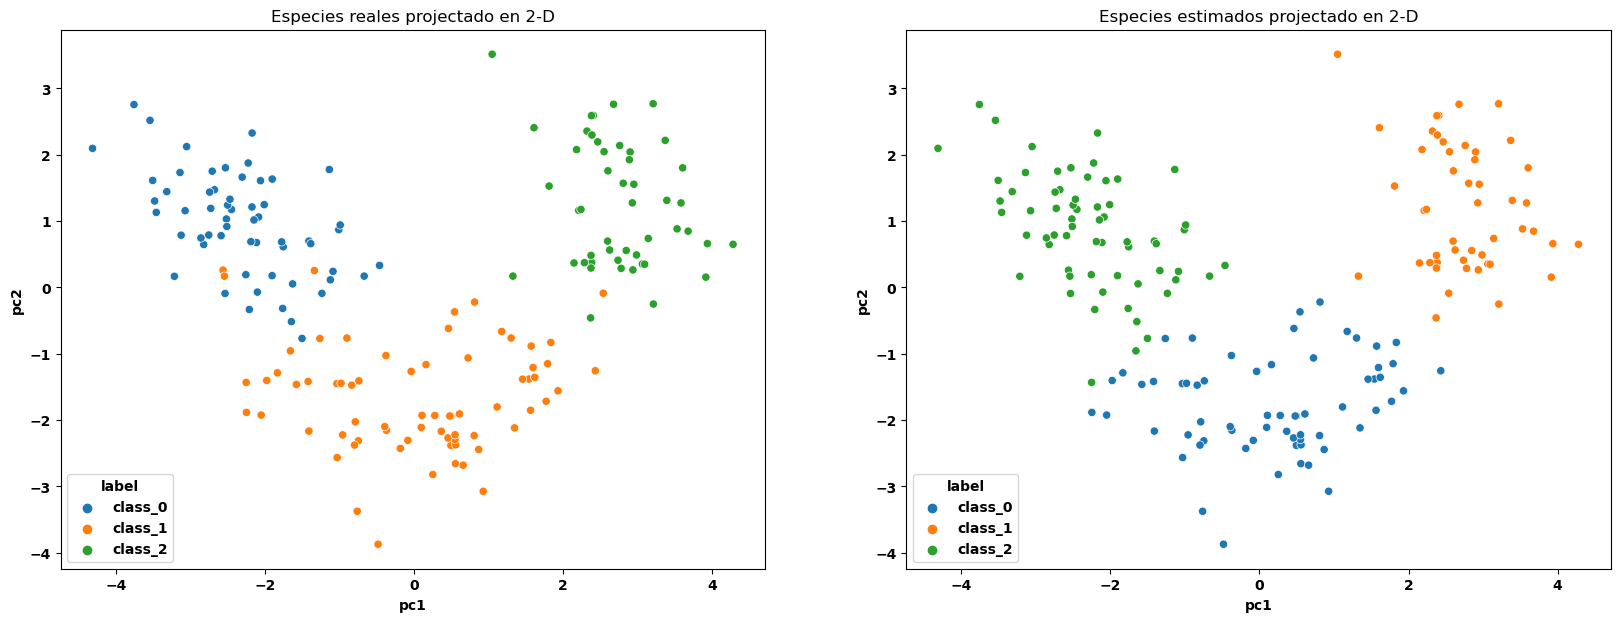

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=df_proj['pc1'], y=df_proj['pc2'], hue=dataset_vino['label'], ax=axes[0])
axes[0].set_title("Especies reales projectado en 2-D")

sns.scatterplot(x=df_proj['pc1'], y=df_proj['pc2'], hue=y_km_pca, hue_order=['class_0', 'class_1', 'class_2'], ax=axes[1])
axes[1].set_title("Especies estimados projectado en 2-D")

plt.show()

In [ ]:
diff_pos_pca = [i for i in range(len(y_km_pca)) if y_km_pca[i]!=dataset_vino['label'][i]]
print("El modelo de clustering se ha equivocado en clasificar %s vinos" % len(diff_pos_pca))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_pca)/len(y_km_pca))*100))
y_km_pca[diff_pos_pca]

El modelo de clustering se ha equivocado en clasificar 177 vinos
El porcentage de acierto es 0.5617977528089901%


0      class_2
1      class_2
2      class_2
3      class_2
4      class_2
        ...   
173    class_1
174    class_1
175    class_1
176    class_1
177    class_1
Name: label, Length: 177, dtype: object

Aquí podemos ver que **el rendimiento del modelo usando los datos proyeccionados a una dimensionalidad mucho menor, es el mismo que los datos originales**. Esto quiere decir que **al usar los 2 primeros componentes principales para transformar los datos, se mantienen las variaciones más importantes y la información principal** que está presente en los datos originales. 

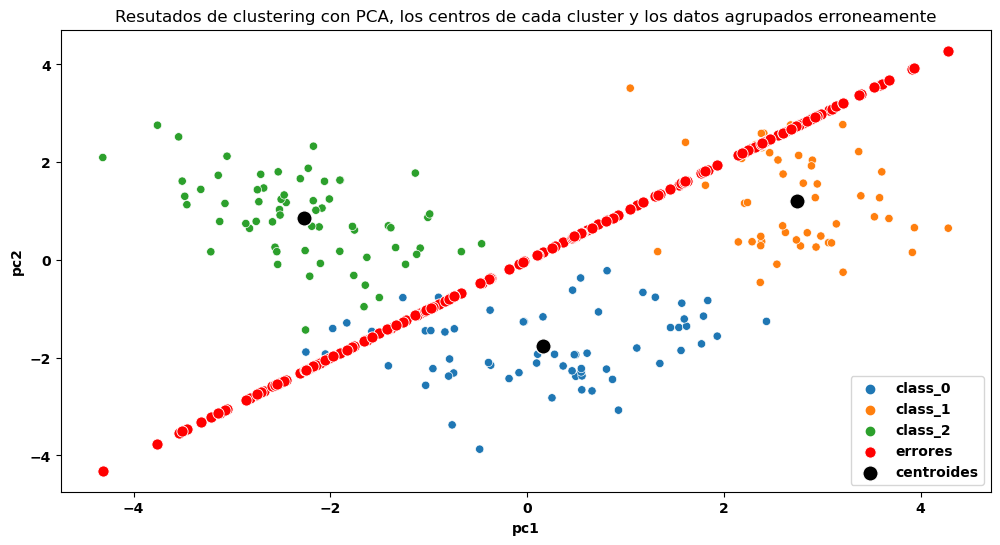

In [ ]:
sns.scatterplot(x=df_proj['pc1'], y=df_proj['pc2'], hue=y_km_pca, hue_order=['class_0', 'class_1', 'class_2'])
sns.scatterplot(x=df_proj['pc1'][diff_pos_pca], y=df_proj['pc1'][diff_pos_pca], marker='o', color = 'red', s=65, label='errores')
sns.scatterplot(x=centros_clust_pca[:, 0], y=centros_clust_pca[:, 1], color='black', s=120, label='centroides')
plt.title("Resutados de clustering con PCA, los centros de cada cluster y los datos agrupados erroneamente")
plt.show()

##### _PCA_ en la librería _sklearn_

Existe un método propio de la librería _scikit-learn_ para reducir la dimensionalidad lineal utilizando la descomposición de valores singulares (_SVD_) para proyectarlos a un espacio dimensional inferior. Vamos a usar el método _PCA_ con el mismo dataset de vinos:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_vino_normal)

PCA()

Si no se indica el número de componentes principales se extraerán todos. 

In [ ]:
pca.n_components_

13

In [ ]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Podemos ver que cada componente aporta una parte de información/variación existente en los datos.

In [ ]:
# La suma acumulativa de las ratios de información representada por cada componente principal
pca.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Podemos usar el método `PCA` en vez de implementación propia en python:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_vino_normal)
pcv = pca.transform(df_vino_normal)

In [ ]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [ ]:
df_pca = pd.DataFrame(data=pcv, columns=['pcv1', 'pcv2'])
df_pca

pcv1      pcv2
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

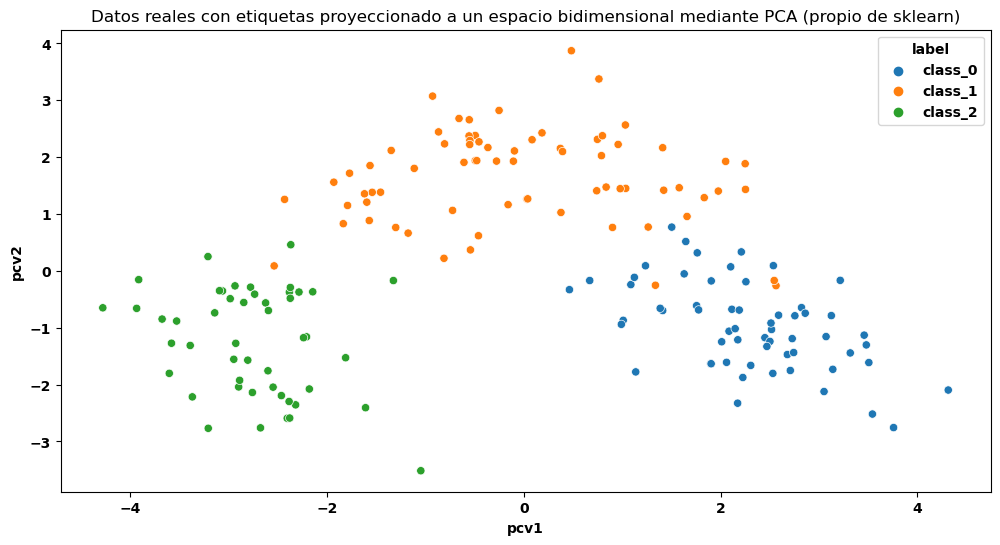

In [ ]:
sns.scatterplot(x=df_pca['pcv1'], y=df_pca['pcv2'], hue=dataset_vino['label'])
plt.title("Datos reales con etiquetas proyeccionado a un espacio bidimensional mediante PCA (propio de sklearn)")
plt.show()

d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SSE =  259.5093807511935
Silhouette score =  0.5610505693103245


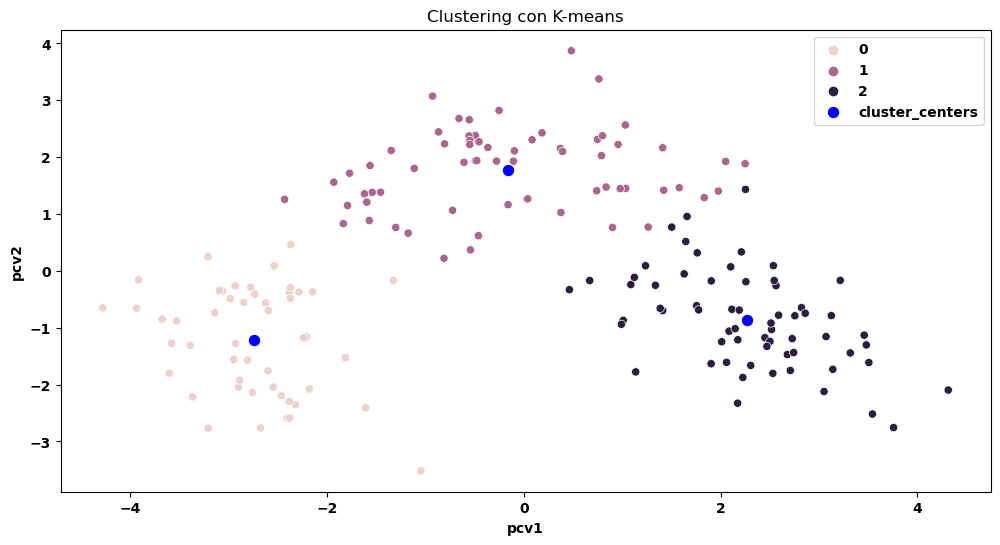

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

modelo_kmeans_pca_skl = KMeans(n_clusters=3, random_state=100)

modelo_kmeans_pca_skl.fit(df_pca)

y_etiquetas_pca_skl = modelo_kmeans_pca_skl.labels_

centros_clust_pca_skl = modelo_kmeans_pca_skl.cluster_centers_

print("SSE = ", modelo_kmeans_pca_skl.inertia_)
print("Silhouette score = ", silhouette_score(df_pca, y_etiquetas_pca_skl))

# Graficar los resultados
sns.scatterplot(x=df_pca['pcv1'], y=df_pca['pcv2'], hue=y_etiquetas_pca_skl)
sns.scatterplot(x=centros_clust_pca_skl[:,0], y=centros_clust_pca_skl[:,1], color='blue', s=80, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

In [ ]:
y_etiquetas_pca_skl

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
y_km_pca_skl = np.where(y_etiquetas_pca_skl==0, 'class_1', np.where(y_etiquetas_pca_skl==1, 'class_0', 'class_2'))
y_km_pca_skl = pd.Series(y_km_pca_skl, name='label')
y_km_pca_skl

0      class_2
1      class_2
2      class_2
3      class_2
4      class_2
        ...   
173    class_1
174    class_1
175    class_1
176    class_1
177    class_1
Name: label, Length: 178, dtype: object

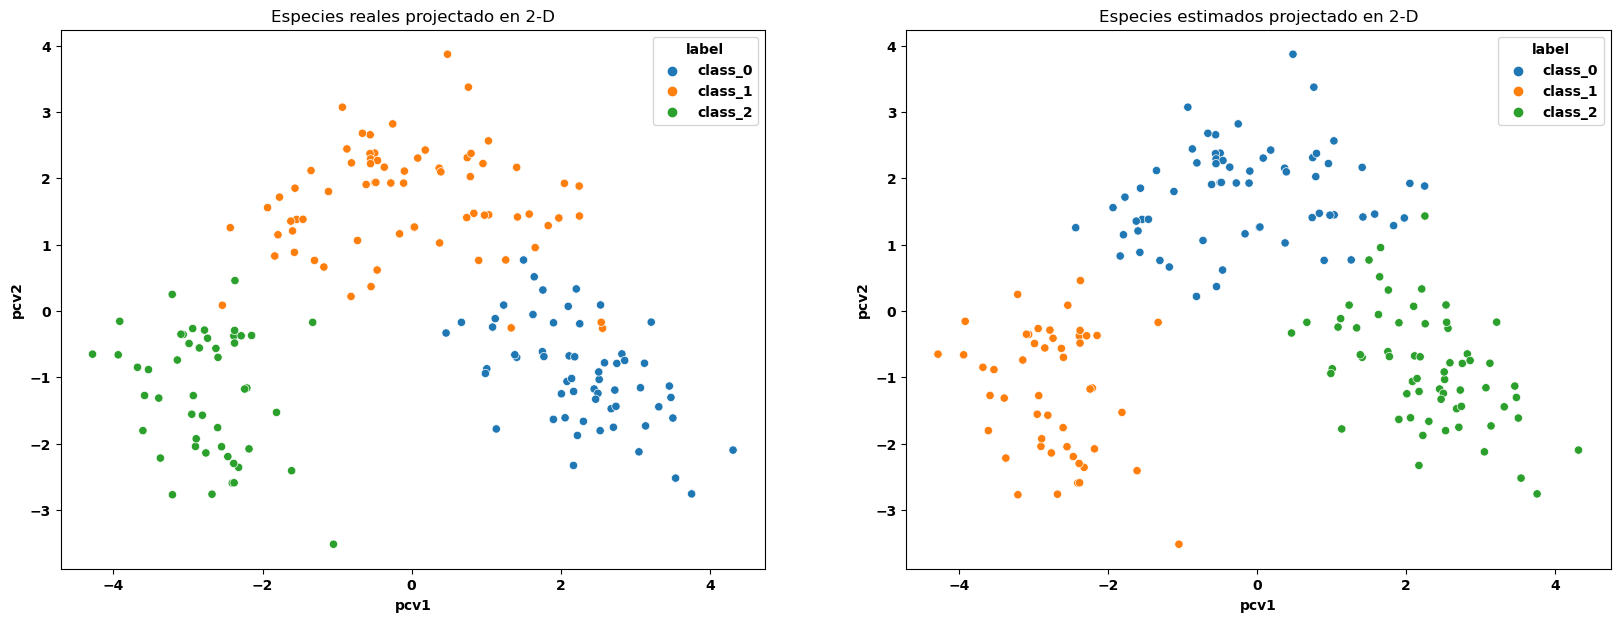

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=df_pca['pcv1'], y=df_pca['pcv2'], hue=dataset_vino['label'], ax=axes[0])
axes[0].set_title("Especies reales projectado en 2-D")

sns.scatterplot(x=df_pca['pcv1'], y=df_pca['pcv2'], hue=y_km_pca_skl, hue_order=['class_0', 'class_1', 'class_2'], ax=axes[1])
axes[1].set_title("Especies estimados projectado en 2-D")

plt.show()

In [ ]:
diff_pos_pca_skl = [i for i in range(len(y_km_pca_skl)) if y_km_pca_skl[i]!=dataset_vino['label'][i]]
print("El modelo de clustering se ha equivocado en clasificar %s vinos" % len(diff_pos_pca_skl))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_pca_skl)/len(y_km_pca_skl))*100))
y_km_pca_skl[diff_pos_pca_skl]

El modelo de clustering se ha equivocado en clasificar 177 vinos
El porcentage de acierto es 0.5617977528089901%


0      class_2
1      class_2
2      class_2
3      class_2
4      class_2
        ...   
173    class_1
174    class_1
175    class_1
176    class_1
177    class_1
Name: label, Length: 177, dtype: object

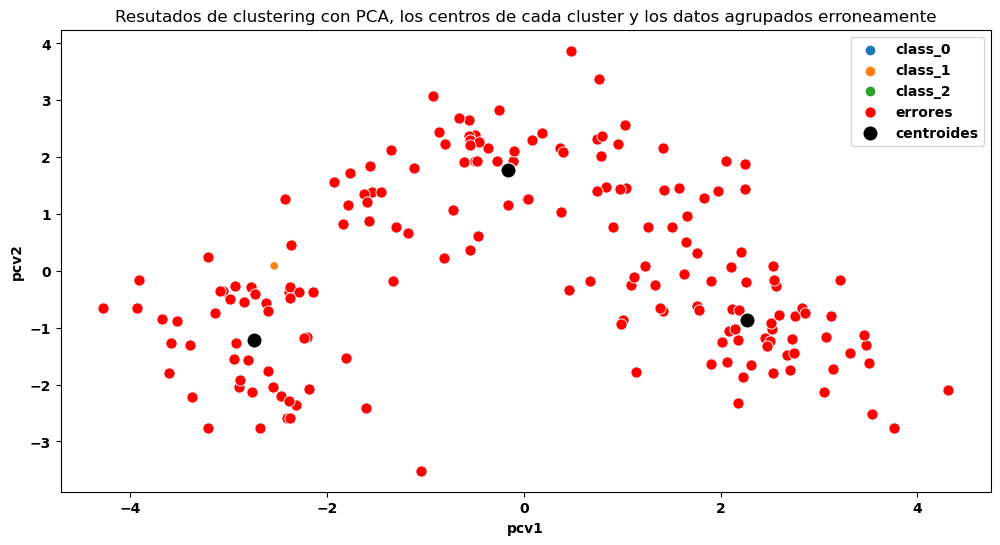

In [ ]:
sns.scatterplot(x=df_pca['pcv1'], y=df_pca['pcv2'], hue=y_km_pca_skl, hue_order=['class_0', 'class_1', 'class_2'])
sns.scatterplot(x=df_pca['pcv1'][diff_pos_pca_skl], y=df_pca['pcv2'][diff_pos_pca_skl], marker='o', color = 'red', s=65, label='errores')
sns.scatterplot(x=centros_clust_pca_skl[:, 0], y=centros_clust_pca_skl[:, 1], color='black', s=120, label='centroides')
plt.title("Resutados de clustering con PCA, los centros de cada cluster y los datos agrupados erroneamente")
plt.show()

---

### Dataset de [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) 

Las características se calculan a partir de una **imagen digitalizada de una autópsia con aguja fina (FNA)** de una masa mamaria. Describen características de los **núcleos celulares presentes en la imagen**.

Con esto se pretende encontrar **un criterio discriminatorio** que nos otorgue una capacidad analítica suficiente para **distinguir entre tumores malignos y benignos**.

In [ ]:
from sklearn.datasets import load_breast_cancer

# Construimos un dataframe con los datos medidos
dataset_cancer = pd.DataFrame(load_breast_cancer()["data"], columns=load_breast_cancer()["feature_names"])

# Añadimos la etiqueta
dataset_cancer["label"] = load_breast_cancer()["target_names"][load_breast_cancer()["target"]]

dataset_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension      label  
0                  0.2654          0.4601                  0.11890  malignant  
1                  0.1860          0.2750                  0.08902  malignant  
2                  0.2430          0.3613                  0.08758  malignant  
3                  0.2575          0.6638                  0.17300  malignant  
4                  0.1625          0.2364        

In [ ]:
# información del DataFrame resultante

dataset_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Comprobar la existencia de valores nulos/perdidos
dataset_cancer.isna().sum().sum()

0

In [ ]:
# Las principales características del conjunto de datos
dataset_cancer.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

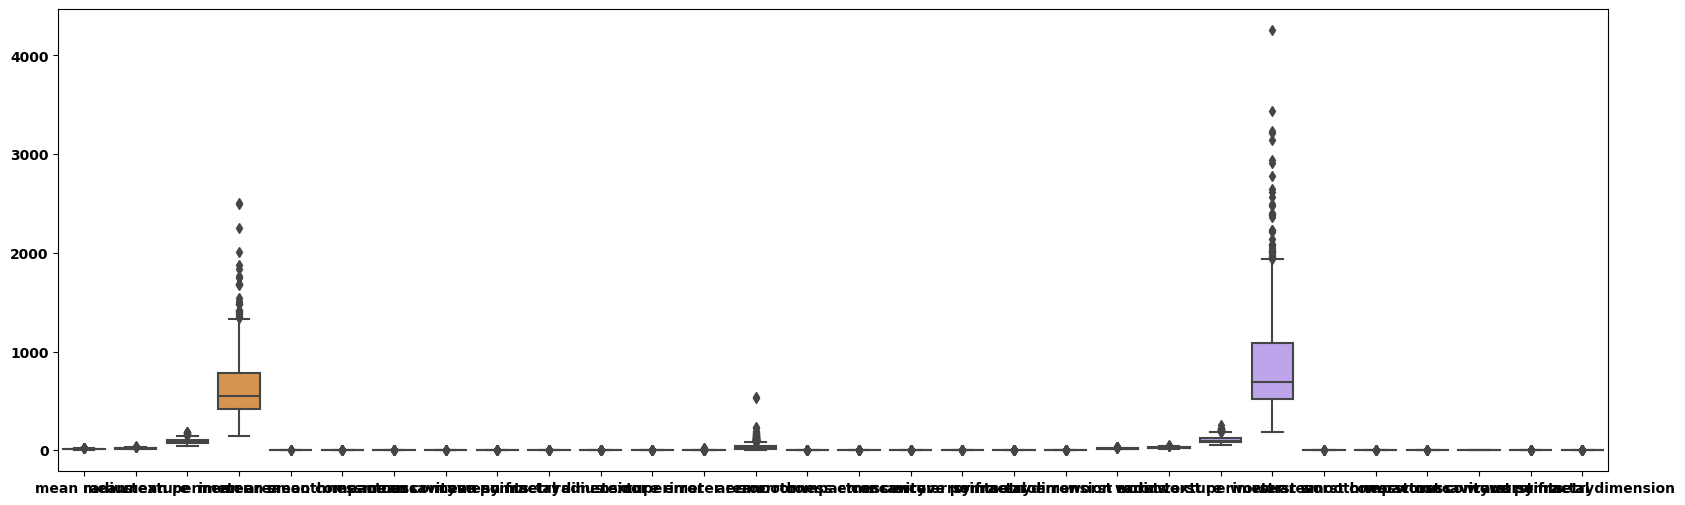

In [ ]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.boxplot(data=dataset_cancer,  orient='v')
plt.show()

In [ ]:
# Filtrar los datos numéricos
df_cancer_num = dataset_cancer.drop("label", axis='columns')
df_cancer_num

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

Procedemos a estandarizar el contenido de las variables del dataset:

In [ ]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado_cancer = StandardScaler().fit(df_cancer_num)
dataset_cancer_normal = escalado_cancer.transform(df_cancer_num)
dataset_cancer_normal

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
df_cancer_normal = pd.DataFrame(dataset_cancer_normal, columns=df_cancer_num.columns)
print(type(df_cancer_normal))
df_cancer_normal

<class 'pandas.core.frame.DataFrame'>


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension  ...  worst radius  worst texture  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     worst concavity  worst concave points  worst symmetry  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

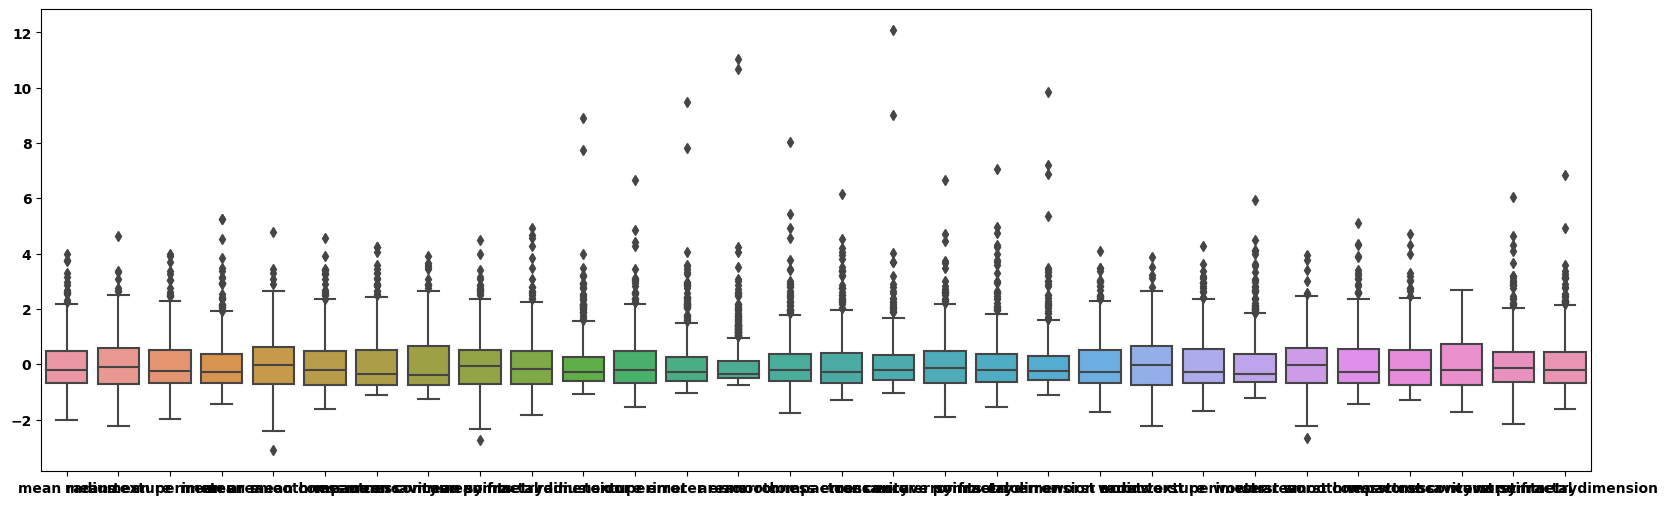

In [ ]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=df_cancer_normal,  orient='v')
plt.show()

Consultamos la correlación entre las características medidas de cada imágen obtenida de los núcleos celulares.

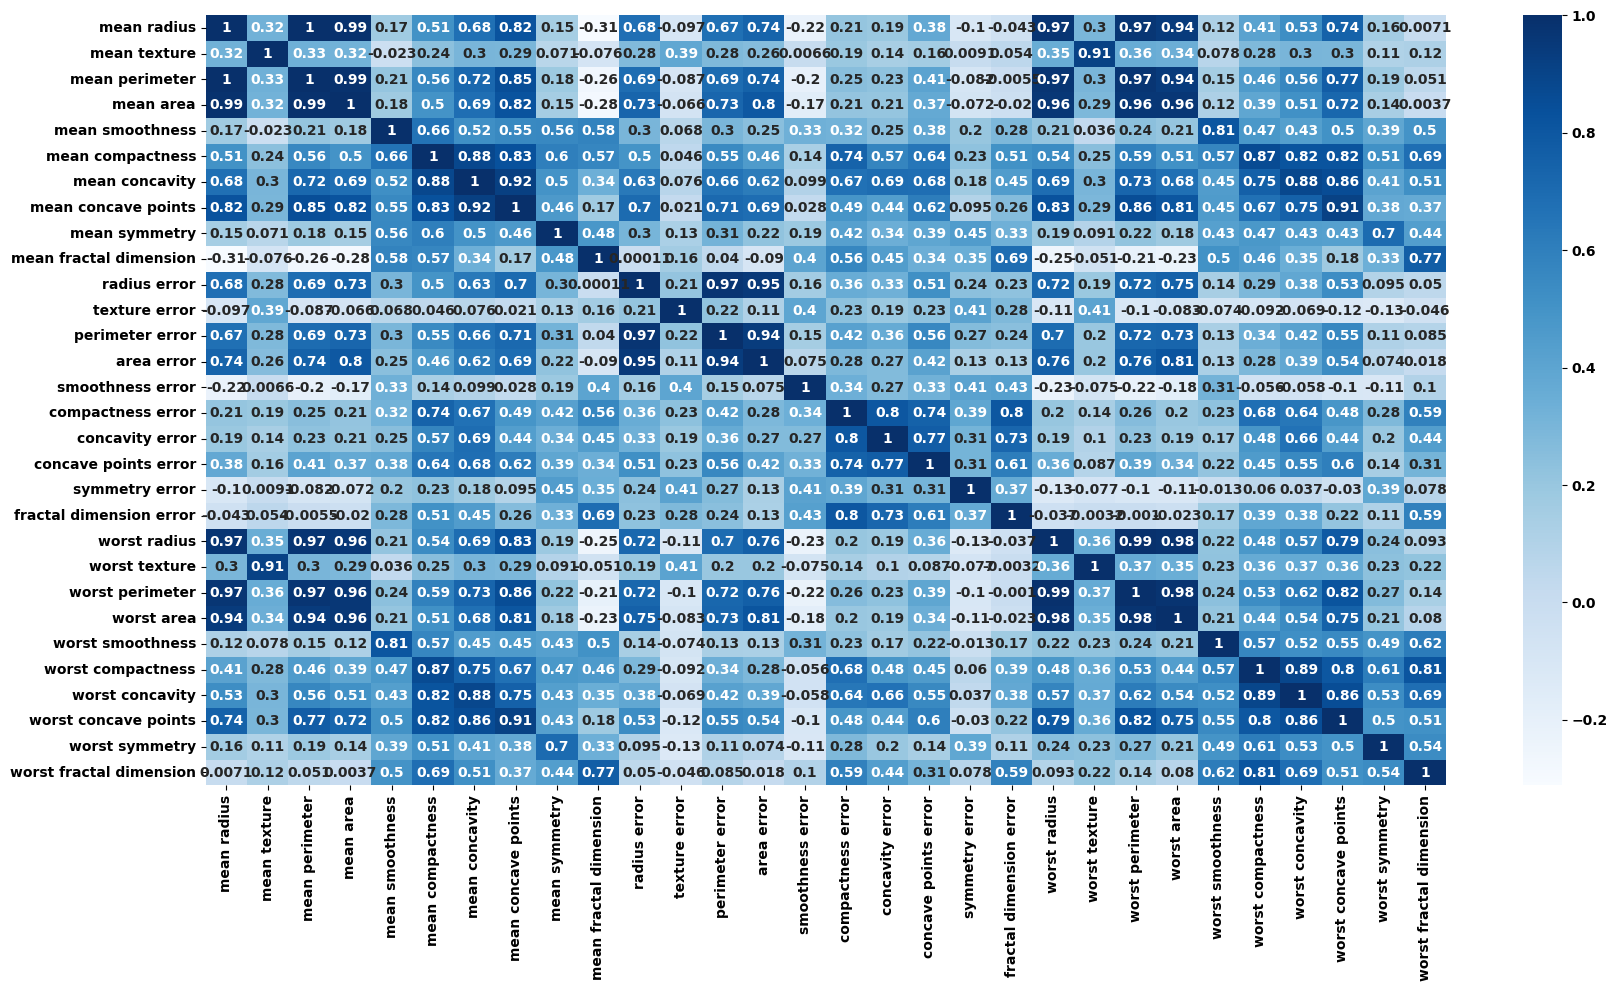

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df_cancer_normal.corr(), cmap='Blues', annot = True)
plt.show()

Se puede observar que hay un número considerable de los **conjuntos de variables correlacionadas**. Esto quiere decir que existe **una información redundante** que aumenta la dimensionalidad sin aportar mucha calidad a los datos.

In [ ]:
# Consultamos el número de las casillas con una correlación alta que representan los conjuntos de variables altamente correlacionadas
np.where(df_cancer_normal.corr().values > 0.85, 1,0).sum()/2 -30

14.0

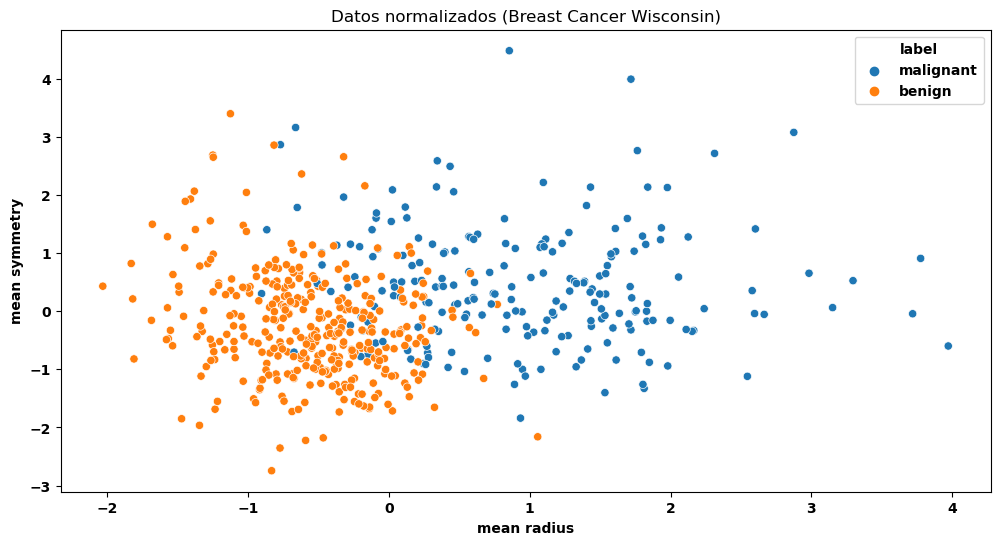

In [ ]:
sns.scatterplot(x=df_cancer_normal['mean radius'], y=df_cancer_normal['mean symmetry'], hue=dataset_cancer['label'])
plt.title("Datos normalizados (Breast Cancer Wisconsin)")
plt.show()

---

### **`Ejercicio 20.1`**

Vamos a realizar un ejercicio de **_clustring_** usando la técnica de **_K-Means_** para agrupar los tejidos conseguidos por autópsia de varios pacientes que realizarón el diagnóistico de cancer de mama:

**`20.1.1`** Utiliza la técnica de __K-Means clustering__ para agrupar los núcleso celulares en **2 grupos**. Grafica los resultados, visualizando los puntos de datos por sus valores relacionados a las variables _`mean radius` versus `mean symmetry`_, pintando cada punto por su `cluster` junto con los `centroides` de cada grupo y saca las métricas para evaluar el algoritmo de agrupación:
 - SSE
 - Silhouette score
 - `random_state=100`

**`20.1.2`** Calcula para este primer modelo **el porcentage de acierto** de acuerdo con las etiquetas reales como `malignant` y `benign`.

**`20.1.3`** Aplica un análisis de componentes principales usando el método `PCA` de la librería _sklearn_ para llevar los datos a un espacio bidimensional. Calcula **el porcentaje total de varianza** que incluyen los dos componentes principales juntos. Y visualiza en una gráfica los datos proyeccionados con sus etiquetas reales como `malignant` y `benign`.

**`20.1.4`** Utiliza la técnica de __K-Means clustering__ para agrupar los **datos transformados** en 2 grupos. Grafica los resultados, visualizando los puntos de datos pintandos por su `cluster` junto con los `centroides` de cada grupo y saca las métricas para evaluar el algoritmo de agrupación:
 - SSE
 - Silhouette score
 - `random_state=100`

**`20.1.5`** Calcula para este último modelo creado con los datos proyeccionados, **el porcentage de acierto** de acuerdo con las etiquetas reales como `malignant` y `benign`. Después, **analiza y compara** el rendimiento de este modelo con el modelo desarrollado sobre los datos originales y **explica** si ha aportado algo la aplicación de la técnica de **PCA** en este caso.


d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


SSE =  11595.461473962347
Silhouette score =  0.3449740051034408


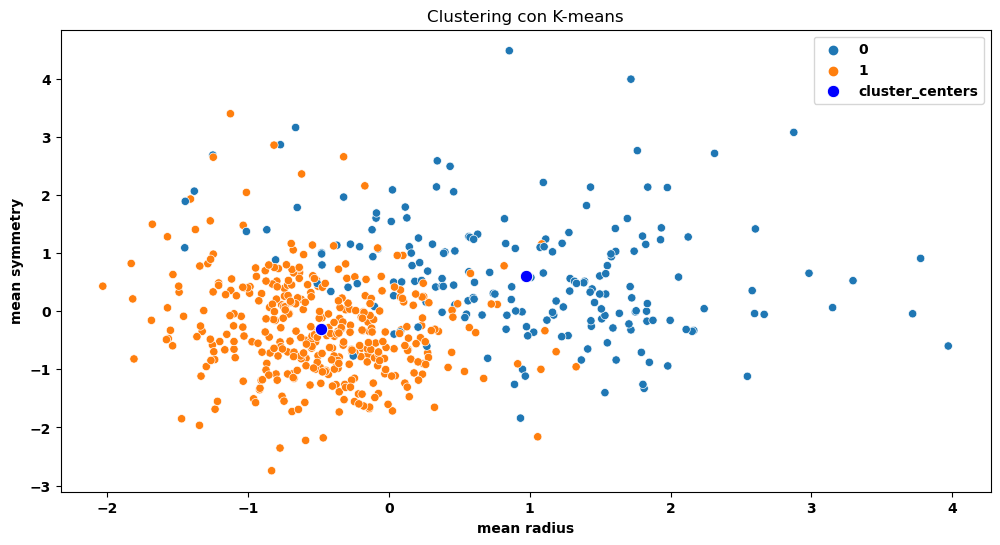

In [ ]:
## Solución 20.1.1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

modelo_20_1_1 = KMeans(n_clusters=2, random_state=100)

modelo_20_1_1.fit(df_cancer_normal)

y_etiquetas_20_1_1 = modelo_20_1_1.labels_

centros_clust_20_1_1 = modelo_20_1_1.cluster_centers_

print("SSE = ", modelo_20_1_1.inertia_)
print("Silhouette score = ", silhouette_score(df_cancer_normal, y_etiquetas_20_1_1))

sns.scatterplot(x=df_cancer_normal['mean radius'], y=df_cancer_normal['mean symmetry'], hue=y_etiquetas_20_1_1)

sns.scatterplot(x=centros_clust_20_1_1[:,df_cancer_normal.columns.get_loc('mean radius')],
                y=centros_clust_20_1_1[:,df_cancer_normal.columns.get_loc('mean symmetry')],
                color='blue', s=80, label='cluster_centers')

plt.title("Clustering con K-means")
plt.show()


In [ ]:
## Solución 20.1.2
y_label_20_1_2 = np.where(y_etiquetas_20_1_1 == 0, 'benign', 'malignant')
y_label_20_1_2 = pd.Series(y_label_20_1_2, name='label')

In [ ]:
diff_pos_20_1_2 = [i for i in range(len(y_label_20_1_2)) if y_label_20_1_2[i] != dataset_cancer['label'][i]]

print("El modelo de clustering se ha equivocado en clasificar %s registros." % len(diff_pos_20_1_2))
print("El porcentaje de acierto es {acc}%".format(acc=(1 - len(diff_pos_20_1_2) / len(y_label_20_1_2)) * 100))

El modelo de clustering se ha equivocado en clasificar 518 registros.
El porcentaje de acierto es 8.96309314586995%


In [ ]:
## Solución 20.1.3
from sklearn.decomposition import PCA
pca_20_1_3 = PCA(n_components=2)

pca_20_1_3.fit(df_cancer_normal)
pcv_20_1_3 = pca_20_1_3.transform(df_cancer_normal)

In [ ]:
print("Porcentaje total de varianza:", pca_20_1_3.explained_variance_ratio_.sum(), '%')

Porcentaje total de varianza: 0.632432076515594 %


In [ ]:
df_pca_20_1_3 = pd.DataFrame(data=pcv_20_1_3, columns=['pcv1', 'pcv2'])


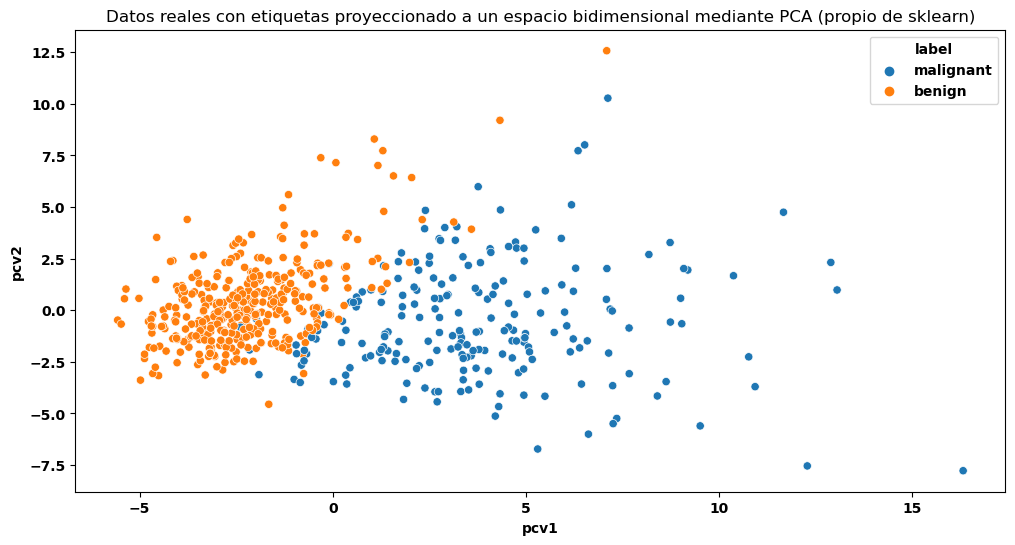

In [ ]:
sns.scatterplot(x=df_pca_20_1_3['pcv1'], y=df_pca_20_1_3['pcv2'], hue=dataset_cancer['label'])

plt.title("Datos reales con etiquetas proyeccionado a un espacio bidimensional mediante PCA (propio de sklearn)")

plt.show()

d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


SSE =  5332.55557420314
Silhouette score =  0.5084690190673387


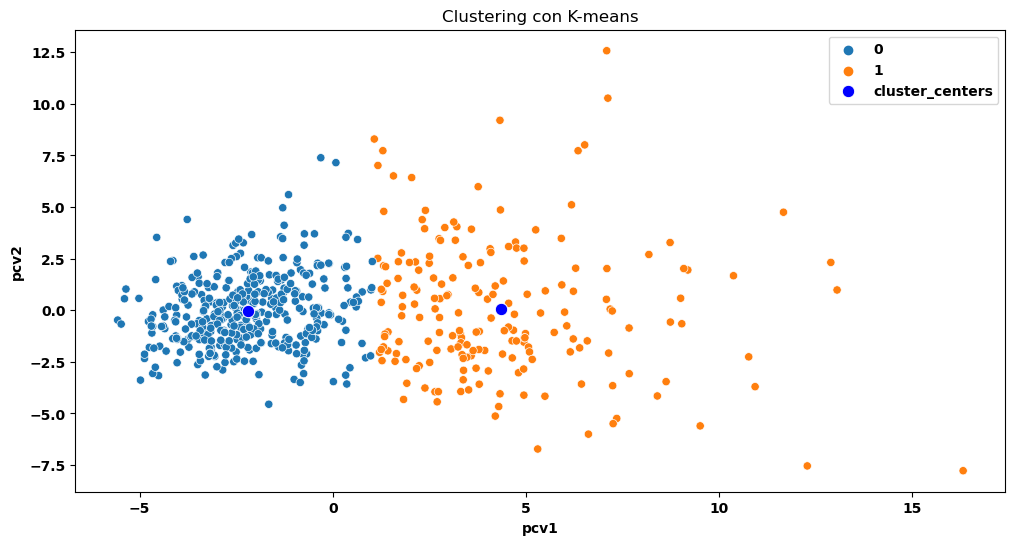

In [ ]:
## Solución 20.1.4
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

modelo_pca_20_1_4 = KMeans(n_clusters=2, random_state=100)

modelo_pca_20_1_4.fit(df_pca_20_1_3)

y_etiquetas_pca_20_1_4 = modelo_pca_20_1_4.labels_

centros_clust_pca_20_1_4 = modelo_pca_20_1_4.cluster_centers_

print("SSE = ", modelo_pca_20_1_4.inertia_)
print("Silhouette score = ", silhouette_score(df_pca_20_1_3, y_etiquetas_pca_20_1_4))

sns.scatterplot(x=df_pca_20_1_3['pcv1'], y=df_pca_20_1_3['pcv2'], hue=y_etiquetas_pca_20_1_4)

sns.scatterplot(x=centros_clust_pca_20_1_4[:,df_pca_20_1_3.columns.get_loc("pcv1")],
                y=centros_clust_pca_20_1_4[:,df_pca_20_1_3.columns.get_loc("pcv2")],
                color='blue', s=80, label='cluster_centers')

plt.title("Clustering con K-means")
plt.show()

In [ ]:
## Solución 20.1.5
y_pca_20_1_5 = np.where(y_etiquetas_pca_20_1_4 == 0, 'benign', 'malignant')

y_pca_20_1_5 = pd.Series(y_pca_20_1_5, name='label')

In [ ]:
diff_pos_20_1_5 = [i for i in range(len(y_pca_20_1_5)) if y_pca_20_1_5[i] != dataset_cancer['label'][i]]

print("El modelo de clustering se ha equivocado en clasificar %s registros." % len(diff_pos_20_1_5))
print("El porcentaje de acierto es {acc}%".format(acc=(1 - len(diff_pos_20_1_5) / len(y_pca_20_1_5)) * 100))

El modelo de clustering se ha equivocado en clasificar 53 registros.
El porcentaje de acierto es 90.68541300527241%


> #### Explicación 20.1.5
> Ambos modelos presentan un porcentaje de acierto **muy parecido**, el modelo de PCA consigue errar en un registro menos que el modelo con los datos originales. Esto los lleva a un rendimiento, en cuanto a precisión muy parecido.
>
> Considero que dada la **complejidad adicional** que se añade al desarrollar un modelo de PCA, teniendo en cuenta los resultados que hemos adquirido, no creo que sea suficiente justificación para preferir este modelo ante el modelo que trabaja con los datos originales. 

---